# 1 Initialisation

## 1.1 Imports

In [217]:
# Librairies pour le traitement des données
import pandas as pd
import numpy as np

# Librairies pour la visualisation de graphiques
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #Définir le style par défaut pour les graphiques


# Librairies pour la visualisation de cartes
import folium # Pour la première fois installer avec la commande 'pip install folium' ou 'conda install folium -c conda-forge'. Voir : https://python-visualization.github.io/folium/quickstart.html
import branca.colormap as cm
from branca.element import Template, MacroElement

## 1.2 Définition de fonctions utilitaires

In [218]:
def verifier_taille(data):
    """ Fonction de vérification de la taille d'un data set """
    taille = data.shape
    print('Le data set contient :')
    print('\t-', taille[0], 'lignes et', taille[1], 'colonnes.')
    print('\t-', len(data.groupby(data.columns[0])), 'pays.')
    nb_null = data.isnull().sum().sum()
    taille = taille[0]*taille[1]
    print('\t-', nb_null, 'valeurs manquantes, ce qui représente', round(100*nb_null/taille,2), '% du data set.')

    # Afficher la répartition du taux de valeurs manquantes
    nan_data = pd.DataFrame({'valeurs': [''], 'non-null': [100*(taille-nb_null)/taille], 'null': [100*nb_null/taille]})
    nan_data.set_index('valeurs').plot(kind='barh', stacked=True, color=['green', 'orange'], figsize=(8,2), fontsize=12)
    plt.xlabel('%')

def afficher_echantillon(data, n=2):
    """ Afficher un sous-échantillon aléatoire """
    print('Voici un sous-échantillon aléatoire :')
    return data.sample(n, random_state=np.random.seed())

def valeurs_manquantes(data):
    """ Retourner les valeurs manquantes d'un data frame/set """
    return data[data.isnull().any(axis=1)]

## 1.3 Récupération du Data Set

Le data set contient :
	- 886930 lignes et 69 colonnes.
	- 242 pays.
	- 52568249 valeurs manquantes, ce qui représente 85.9 % du data set.
Voici un sous-échantillon aléatoire :


Country Name Country Code                         Indicator Name  \
658451       Romania          ROU              Population, age 9, female   
679397  Saudi Arabia          SAU  Inbound mobility rate, both sexes (%)   

           Indicator Code  1970  1971  1972  1973  1974  1975  ...  2055  \
658451  SP.POP.AG09.FE.UN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
679397        UIS.MSEP.56   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

        2060  2065  2070  2075  2080  2085  2090  2095  2100  
658451   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
679397   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[2 rows x 69 columns]

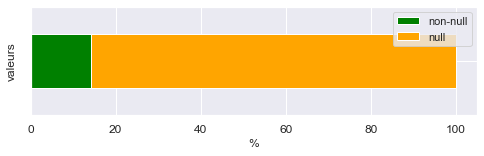

In [219]:
# Ouverture du fichier CSV en téléchargement : https://databank.worldbank.org/data/download/Edstats_csv.zip
df = pd.read_csv('EdStatsData.csv', sep=',') #le fichier doit être placé dans le même répertoire que ce notebook

verifier_taille(df)

afficher_echantillon(df)

<em># On peut constater que le data set contient une très grande quantité de valeurs manquantes. Donc à priori le data set paraît de mauvaise qualité. Mais vu qu’il contient un nombre important (4000) d’indicateurs sur plusieurs aspects de l'éducation étalés sur une très grande période (1970-2100), Il faudra donc filtrer le data set plusieurs fois et le transformer afin de ce concentrer sur notre problématique et l'exploiter par la suite</em>

In [220]:
# Vérifier l'existence de données dupliquées
df.groupby(df.columns.tolist()[3:],as_index=False).size()

Empty DataFrame
Columns: [Indicator Code, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, size]
Index: []

[0 rows x 67 columns]

<p><em># Le data set ne contient pas de données dupliquées</em></p>

## 1.4 Récupération & Filtrage des meta data

<em># Les meta data nous donnent des informations supplémentaires utiles à l'étude</em>

### 1.4.1 Récupération des meta data

Le data set contient :
	- 241 lignes et 31 colonnes.
	- 241 pays.
	- 2113 valeurs manquantes, ce qui représente 28.28 % du data set.
Voici un sous-échantillon aléatoire :


Country Code          Short Name          Table Name           Long Name  \
149          MNE          Montenegro          Montenegro          Montenegro   
181          PSE  West Bank and Gaza  West Bank and Gaza  West Bank and Gaza   

    2-alpha code       Currency Unit  \
149           ME                Euro   
181           PS  Israeli new shekel   

                                         Special Notes  \
149  Montenegro declared independence from Serbia a...   
181                                                NaN   

                         Region         Income Group WB-2 code  ...  \
149       Europe & Central Asia  Upper middle income        ME  ...   
181  Middle East & North Africa  Lower middle income        GZ  ...   

    Government Accounting concept             IMF data dissemination standard  \
149                           NaN    General Data Dissemination System (GDDS)   
181  Budgetary central government  Special Data Dissemination Standard (SDDS)   

    Latest population census  \
149                     2011   
181                     2007   

                               Latest household survey  \
149  Multiple Indicator Cluster Survey (MICS), 2005/06   
181     Multiple Indicator Cluster Survey (MICS), 2010   

    Source of most recent Income and expenditure data  \
149    Expenditure survey/budget survey (ES/BS), 2011   
181           Integrated household survey (IHS), 2009   

    Vital registration complete Latest agricultural census  \
149                         Yes                       2010   
181                         NaN                        NaN   

    Latest industrial data Latest trade data Latest water withdrawal data  
149                    NaN            2012.0                         2010  
181                 2010.0               NaN                         2005  

[2 rows x 31 columns]

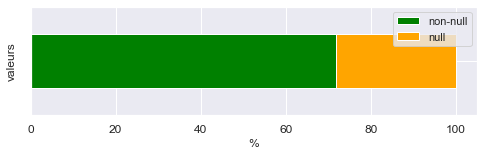

In [221]:
# Ouverture du fichier meta data (md)
md = pd.read_csv('EdStatsCountry.csv', sep=',')

verifier_taille(md)

afficher_echantillon(md)

### 1.4.2 Récupération des agrégats de pays

<em># Certains individus du data set ne sont pas des pays singuliers, mais des agrégats (groupes) de pays qui doivent donc être filtrés et/ou stockés dans un data frame dédiés pour des futurs traitements</em>

In [222]:
# Récupérer et afficher les agrégats de pays et éventuellement les pays sans meta data
agreg_md = md[((md['Region'].isnull()) | (md['Income Group'].isnull())) & (md['Special Notes'].notna())]

afficher_echantillon(agreg_md)

Voici un sous-échantillon aléatoire :


Country Code                               Short Name  \
59           ECA  Europe & Central Asia (developing only)   
187          SAS                               South Asia   

                Table Name                                Long Name  \
59   Europe & Central Asia  Europe & Central Asia (developing only)   
187             South Asia                               South Asia   

    2-alpha code Currency Unit  \
59            7E           NaN   
187           8S           NaN   

                                         Special Notes Region Income Group  \
59   Europe and Central Asia regional aggregate (do...    NaN          NaN   
187  South Asia regional aggregate. There are no ec...    NaN          NaN   

    WB-2 code  ... Government Accounting concept  \
59         7E  ...                           NaN   
187        8S  ...                           NaN   

     IMF data dissemination standard Latest population census  \
59                               NaN                      NaN   
187                              NaN                      NaN   

    Latest household survey Source of most recent Income and expenditure data  \
59                      NaN                                               NaN   
187                     NaN                                               NaN   

    Vital registration complete Latest agricultural census  \
59                          NaN                        NaN   
187                         NaN                        NaN   

    Latest industrial data Latest trade data Latest water withdrawal data  
59                     NaN               NaN                          NaN  
187                    NaN               NaN                          NaN  

[2 rows x 31 columns]

### 1.4.3 Filtrage des meta data des pays

Le data set contient :
	- 216 lignes et 4 colonnes.
	- 216 pays.
	- 4 valeurs manquantes, ce qui représente 0.46 % du data set.
Voici un sous-échantillon aléatoire :


Country Code  Short Name               Region         Income Group
66          FSM  Micronesia  East Asia & Pacific  Lower middle income
73          GMB  The Gambia   Sub-Saharan Africa           Low income

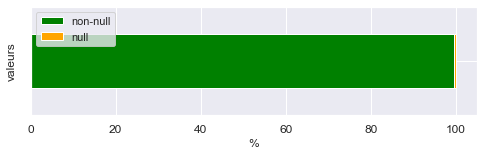

In [223]:
# Retirer les agrégats des meta data (md) et garder que les colonnes nécessaires
md = md.drop(agreg_md.index)[['Country Code','Short Name','Region','Income Group']]

# Réindexer les lignes
md.reset_index(drop=True, inplace=True)

# Vérification des valeurs manquantes
verifier_taille(md)

afficher_echantillon(md)

# 2 Nettoyage du Data Set

## 2.1 Filtrage des individus (lignes)

### 2.1.1 Filtrer les indicateurs

<em> # On commence par éliminer tous les indicateurs inutile à notre étude. On garde uniquement les indicateurs relatifs à : 
    <ul>
        <li>la population (total et croissance)</li>
        <li>Le niveau d'éducation (études) avec les nombres de personnes étudiantes ou diplômées niveau lycée et plus </li>
        <li>Le niveau technologique de la population (internet et ordinateurs)</li>
    </ul>
</em>

Le data set contient :
	- 1936 lignes et 69 colonnes.
	- 242 pays.
	- 84409 valeurs manquantes, ce qui représente 63.19 % du data set.
Voici un sous-échantillon aléatoire :


Country Name Country Code  \
1151  Micronesia, Fed. Sts.          FSM   
831                  Israel          ISR   

                                         Indicator Name    Indicator Code  \
1151  Wittgenstein Projection: Percentage of the tot...  PRJ.ATT.ALL.3.MF   
831   Wittgenstein Projection: Percentage of the tot...  PRJ.ATT.ALL.3.MF   

      1970  1971  1972  1973  1974  1975  ...  2055  2060  2065  2070  2075  \
1151   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
831    NaN   NaN   NaN   NaN   NaN   NaN  ...  0.36  0.37  0.38  0.39  0.39   

      2080  2085  2090  2095  2100  
1151   NaN   NaN   NaN   NaN   NaN  
831    0.4   0.4   0.4   0.4   0.4  

[2 rows x 69 columns]

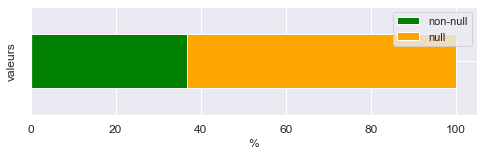

In [224]:
# Liste des indicateurs pertinents pour l'étude
indicators = ['Enrolment in upper secondary education, both sexes (number)', 'Enrolment in post-secondary non-tertiary education, both sexes (number)', 'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total', 'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total', 'Population, total', 'Population growth (annual %)', 'Internet users (per 100 people)', 'Personal computers (per 100 people)']

# Garder uniquement ces indicateurs
df = df[df['Indicator Name'].isin(indicators)]
# Réindexer les lignes
df.reset_index(drop=True, inplace=True)

verifier_taille(df)

afficher_echantillon(df)

<em># Après ce premier filtrage, le nombre de valeurs manquantes a significativement diminué, mais ce nombre reste encore trop important. On continue donc le processus de nettoyage</em>

### 2.1.2 Filtrer les pays agrégats et les sauvegarder pour des futurs imputations

Le data set contient :
	- 1736 lignes et 69 colonnes.
	- 217 pays.
	- 75727 valeurs manquantes, ce qui représente 63.22 % du data set.


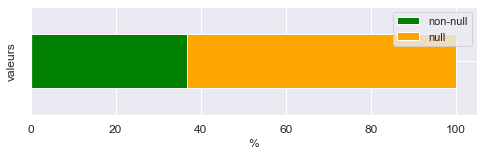

In [225]:
# Retirer les agrégats du data set (df) et les placer dans un nouveau(agreg_countries_df)
agreg_countries = agreg_md['Country Code'].values
agreg_countries_df = df[df['Country Code'].isin(agreg_countries)].sort_values('Country Code')
df = df[~df['Country Code'].isin(agreg_countries)]

# Réindexer les lignes
df.reset_index(drop=True, inplace=True)

verifier_taille(df)

## 2.2 Agrégation des séries temporelles en une seule valeur (pour chaque indicateur de chaque pays)

<em> # La deuxième étape du nettoyage du data set consiste à réduire les séries temporelles en une seule valeur (la première valeur non null)
</em>

### 2.2.0 Fonction utilitaire

In [226]:
def agreger_temps(data, annees, annee_ref):
    """ Fonction Agrégation des séries temporelles en deux :
        - La valeur actuelle en gardant soit : 
            * la dernière valeur non null avant l'année de référence 
            * la première valeur non null après l'année de référence
        - L'année retenue        
    """
    new_df = pd.concat([data[['Country Code', 'Indicator Name']], pd.DataFrame({'Val': data.index, 'Year': data.index}, index=data.index)], axis=1)
    data = data[annees]
    
    # Recherche de la première année (avant ou après) l'année de référence avec une valeur non null
    new_df['Year'] = data.apply(lambda x: x*0+[int(annee)*(np.sign(int(annee_ref)-int(annee)) if annee!=annee_ref else 1) for annee in data.columns.values], axis=1, result_type='broadcast').max(axis=1)    
    new_df = new_df[new_df['Year'].notna()]
    new_df['Year'] = new_df['Year'].map(lambda y: str(np.abs(int(y))))
    
    # Récupérer la valeur depuis le data set selon les années trouvées
    new_df = new_df.apply(lambda x: [x[0], x[1],data.loc[x[2], x[3]], int(x[3])], axis=1, result_type='broadcast')
    
    return new_df.sort_values('Country Code')

### 2.2.1 Agrégation temporelle du data set

In [227]:
# Récupérer la liste des années
annees = df.columns[4:].values

# Agrégation des valeurs sur toutes les années
agreg_temp_df = agreger_temps(df, annees, '2020')

afficher_echantillon(agreg_temp_df)

Voici un sous-échantillon aléatoire :


Country Code                                     Indicator Name  \
258           CPV                    Internet users (per 100 people)   
1424          ESP  Enrolment in post-secondary non-tertiary educa...   

            Val  Year  
258   48.165277  2016  
1424    30926.0  2002

### 2.2.2 Création d'un data set prospectif

In [228]:
# Agrégation des valeurs sur les années futurs, pour construire un data set prospective
annees_futurs = [annee for annee in annees if annee>'2020']

propect_df = agreger_temps(df, annees_futurs, '2020')

afficher_echantillon(propect_df)

Voici un sous-échantillon aléatoire :


Country Code                                     Indicator Name   Val  \
1638          ARE  Wittgenstein Projection: Percentage of the tot...  0.16   
798           KAZ  Wittgenstein Projection: Percentage of the tot...  0.22   

      Year  
1638  2025  
798   2025

In [229]:
# Comparaison de la taille du data set prospective avec le data set original
taille_df = len(df)
taille_propect_df = len(propect_df)

print(round(taille_propect_df/taille_df, 2), '% du data set contient des données prospectives.')

0.19 % du data set contient des données prospectives.


<em> # Le data set contient quasiment pas de données prospectives, on ne les retient donc pas pour la suite de l'étude !</em>

## 2.3 Transformation du data set : les indicateurs deviennent des colonnes avec les agrégations temporelles

### 2.3.1 Etablir la nouvelle structure du data set

In [230]:
countries = df['Country Code'].sort_values().unique()
new_df = pd.concat([pd.DataFrame({'Country Code':countries}), pd.DataFrame(np.full([len(countries), len(indicators)], np.nan), columns=indicators)], axis=1)

afficher_echantillon(new_df)

Voici un sous-échantillon aléatoire :


Country Code  Enrolment in upper secondary education, both sexes (number)  \
75          GNQ                                                NaN             
63          FJI                                                NaN             

    Enrolment in post-secondary non-tertiary education, both sexes (number)  \
75                                                NaN                         
63                                                NaN                         

    Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total  \
75                                                NaN                                                                                
63                                                NaN                                                                                

    Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total  \
75                                                NaN                                                                               
63                                                NaN                                                                               

    Population, total  Population growth (annual %)  \
75                NaN                           NaN   
63                NaN                           NaN   

    Internet users (per 100 people)  Personal computers (per 100 people)  
75                              NaN                                  NaN  
63                              NaN                                  NaN

### 2.3.2 Remplir le data set avec les agrégations temporelles

In [231]:
years = agreg_temp_df.groupby('Country Code')['Year'].mean()
agreg_temp_countries = agreg_temp_df['Country Code'].unique()

for country in new_df['Country Code']:    
    new_df.loc[new_df['Country Code']==country, 'Year'] = int(years.loc[country]) if country in agreg_temp_countries else np.nan
    for indicator in indicators:
        val = agreg_temp_df[(agreg_temp_df['Country Code']==country) & (agreg_temp_df['Indicator Name']==indicator)]['Val'].values
        val = val[0] if len(val)>0 else np.nan
        new_df.loc[new_df['Country Code']==country, indicator] = val 

### 2.3.3 Ajout des meta data : groupe économique et région

Le data set contient :
	- 217 lignes et 13 colonnes.
	- 217 pays.
	- 235 valeurs manquantes, ce qui représente 8.33 % du data set.
Voici un sous-échantillon aléatoire :


Country Code        Short Name                     Region  \
151          PAN            Panama  Latin America & Caribbean   
126          MHL  Marshall Islands        East Asia & Pacific   

            Income Group  \
151  Upper middle income   
126  Upper middle income   

     Enrolment in upper secondary education, both sexes (number)  \
151                                           117100.0             
126                                             3044.0             

     Enrolment in post-secondary non-tertiary education, both sexes (number)  \
151                                            11198.0                         
126                                              690.0                         

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total  \
151                                               0.22                                                                                
126                                                NaN                                                                                

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total  \
151                                               0.15                                                                               
126                                                NaN                                                                               

     Population, total  Population growth (annual %)  \
151          4034119.0                      1.621103   
126            53066.0                      0.135772   

     Internet users (per 100 people)  Personal computers (per 100 people)  \
151                        54.000000                             6.050407   
126                        29.787779                             9.601721   

       Year  
151  2014.0  
126  2010.0

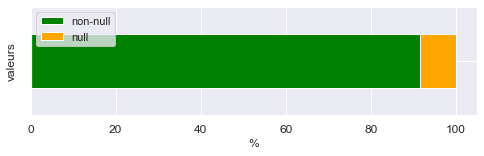

In [232]:
# Fusion du data set avec les meta data
df = md.merge(new_df, how='right')

verifier_taille(df)

afficher_echantillon(df)

<em># Arrivé à ce stade du processus de nettoyage, le nombre de valeurs manquantes a drastiquement diminué. On se rapproche d'un data set propre et exploitable</em>

## 2.4 Traitement des valeurs manquantes

<em># La dernière phase du nettoyage du data set consiste essayer d'imputer les valeurs, quand cela est possible, avec plusieurs méthodes et finir par éliminer les individus (pays) pour lesquels les imputations successives auront échouées</em>

### 2.4.1 Filtrer les pays sans meta data (région et groupe économique)

In [233]:
# Rechercher les pays sans région ou sans groupe économique
na_md_countries = df[(df['Region'].isna()) | (df['Income Group'].isna())]
na_md_countries

Country Code Short Name Region Income Group  \
71           GIB  Gibraltar    NaN          NaN   
147          NRU      Nauru    NaN          NaN   
207          VGB        NaN    NaN          NaN   

     Enrolment in upper secondary education, both sexes (number)  \
71                                               806.0             
147                                              370.0             
207                                                NaN             

     Enrolment in post-secondary non-tertiary education, both sexes (number)  \
71                                               896.0                         
147                                               24.0                         
207                                                NaN                         

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total  \
71                                                 NaN                                                                                
147                                                NaN                                                                                
207                                                NaN                                                                                

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total  \
71                                                 NaN                                                                               
147                                                NaN                                                                               
207                                                NaN                                                                               

     Population, total  Population growth (annual %)  \
71             34408.0                      0.524507   
147                NaN                           NaN   
207                NaN                           NaN   

     Internet users (per 100 people)  Personal computers (per 100 people)  \
71                         94.444472                            54.842602   
147                              NaN                                  NaN   
207                              NaN                                  NaN   

       Year  
71   2011.0  
147  2010.0  
207     NaN

Le data set contient :
	- 214 lignes et 13 colonnes.
	- 214 pays.
	- 211 valeurs manquantes, ce qui représente 7.58 % du data set.


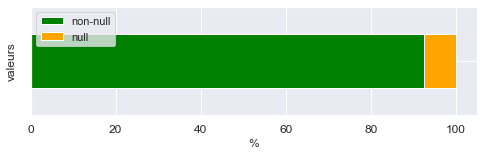

In [234]:
# Supprimer les pays sans région ou sans groupe économique
df.drop(na_md_countries.index, inplace=True)
df.reset_index(drop=True, inplace=True)

verifier_taille(df)

<em># Réduction faible mais notable des valeurs manquantes</em>

### 2.4.2 Filtrer les pays avec trop de valeurs manquantes

<em># On élimine les pays avec beaucoup de valeurs manquantes, car même si on les imputer ces pays ne seraient pas significatifs</em>

In [235]:
# Rechercher les pays avec trop de valeurs manquantes
nan_df = pd.DataFrame(valeurs_manquantes(df).isna().sum(axis=1).sort_values(ascending=False), columns=['Nb_NaN'])
nan_df = nan_df[nan_df['Nb_NaN']>=len(indicators)/2].join(df)

afficher_echantillon(nan_df)

Voici un sous-échantillon aléatoire :


Nb_NaN Country Code      Short Name                     Region  \
205       4          VIR  Virgin Islands  Latin America & Caribbean   
46        4          CUW         Curaçao  Latin America & Caribbean   

             Income Group  \
205  High income: nonOECD   
46   High income: nonOECD   

     Enrolment in upper secondary education, both sexes (number)  \
205                                                NaN             
46                                              6981.0             

     Enrolment in post-secondary non-tertiary education, both sexes (number)  \
205                                                NaN                         
46                                              3639.0                         

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total  \
205                                                NaN                                                                                
46                                                 NaN                                                                                

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total  \
205                                                NaN                                                                               
46                                                 NaN                                                                               

     Population, total  Population growth (annual %)  \
205           102951.0                     -0.603319   
46            153500.0                      0.945169   

     Internet users (per 100 people)  Personal computers (per 100 people)  \
205                        59.608316                             2.783758   
46                               NaN                                  NaN   

       Year  
205  2013.0  
46   2013.0

Le data set contient :
	- 200 lignes et 13 colonnes.
	- 200 pays.
	- 141 valeurs manquantes, ce qui représente 5.42 % du data set.
Voici un sous-échantillon aléatoire :


Country Code Short Name                     Region         Income Group  \
88          JAM    Jamaica  Latin America & Caribbean  Upper middle income   
71          GRC     Greece      Europe & Central Asia    High income: OECD   

    Enrolment in upper secondary education, both sexes (number)  \
88                                            87860.0             
71                                           371024.0             

    Enrolment in post-secondary non-tertiary education, both sexes (number)  \
88                                            74652.0                         
71                                            38874.0                         

    Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total  \
88                                               0.09                                                                                
71                                               0.37                                                                                

    Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total  \
88                                               0.14                                                                               
71                                               0.20                                                                               

    Population, total  Population growth (annual %)  \
88          2881355.0                      0.327500   
71         10746740.0                     -0.687543   

    Internet users (per 100 people)  Personal computers (per 100 people)  \
88                        45.000000                             6.673753   
71                        69.087915                             9.454862   

      Year  
88  2015.0  
71  2014.0

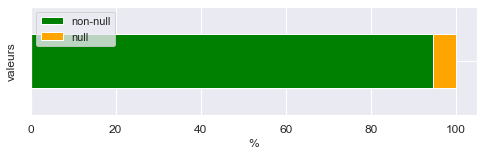

In [236]:
# Supprimer ces pays avec trop de valeurs manquantes
df.drop(nan_df.index, inplace=True)
df.reset_index(drop=True, inplace=True)

verifier_taille(df)

afficher_echantillon(df)

<em># Les valeurs manquantes ont encore une fois diminué</em>

### 2.4.3 Imputation des valeurs manquantes

<em># Début du processus d'imputation</em>

#### 2.4.3.1 Avec les moyennes par région et groupe économique depuis le data set

Le data set contient :
	- 200 lignes et 13 colonnes.
	- 200 pays.
	- 7 valeurs manquantes, ce qui représente 0.27 % du data set.


Country Code         Short Name                     Region  \
23           BMU            Bermuda              North America   
33           CHL              Chile  Latin America & Caribbean   
70           GNQ  Equatorial Guinea         Sub-Saharan Africa   
78           HTI              Haiti  Latin America & Caribbean   
177          TJK         Tajikistan      Europe & Central Asia   

             Income Group  \
23   High income: nonOECD   
33      High income: OECD   
70   High income: nonOECD   
78             Low income   
177            Low income   

     Enrolment in upper secondary education, both sexes (number)  \
23                                              2188.0             
33                                           1032041.0             
70                                              3909.0             
78                                                 NaN             
177                                           236051.0             

     Enrolment in post-secondary non-tertiary education, both sexes (number)  \
23                                                 NaN                         
33                                                 NaN                         
70                                                 NaN                         
78                                             14380.0                         
177                                                NaN                         

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total  \
23                                                 NaN                                                                                
33                                                0.35                                                                                
70                                                0.15                                                                                
78                                                0.10                                                                                
177                                               0.43                                                                                

     Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total  \
23                                                 NaN                                                                               
33                                                0.13                                                                               
70                                                0.04                                                                               
78                                                0.03                                                                               
177                                               0.07                                                                               

     Population, total  Population growth (annual %)  \
23             65331.0                      0.147160   
33          17909754.0                      0.824580   
70           1221490.0                      3.847227   
78          10847334.0                      1.264239   
177          8734951.0                      2.155884   

     Internet users (per 100 people)  Personal computers (per 100 people)  \
23                         98.000000                            22.296631   
33                         66.010000                            14.077827   
70                         23.780000                             1.490935   
78                         12.232602                             5.255571   
177                        20.470000                             1.242952   

       Year  
23   2013.0  
33   2015.0  
70   2014.0  
78   2015.0  
177  2015.0

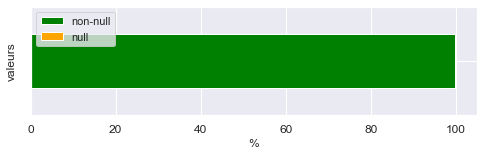

In [237]:
# moyennes des indicateurs par région et groupe économique depuis le data set
means_df = df.groupby(['Region', 'Income Group']).mean()

# Imputation des valeurs manquantes avec les moyennes du data set
for indicator in indicators:
    rows = df[df[indicator].isnull()].index
    for row in rows:        
        df.loc[row, indicator] = means_df.loc[(df.loc[row,'Region'], df.loc[row,'Income Group'])][indicator]

verifier_taille(df)

valeurs_manquantes(df)

<em># Après la première imputation, le nombre de valeurs manquantes a considérablement diminué</em>

#### 2.4.3.2 Avec les agrégats de pays par région

Le data set contient :
	- 200 lignes et 13 colonnes.
	- 200 pays.
	- 2 valeurs manquantes, ce qui représente 0.08 % du data set.


Country Code Short Name         Region          Income Group  \
23          BMU    Bermuda  North America  High income: nonOECD   

    Enrolment in upper secondary education, both sexes (number)  \
23                                             2188.0             

    Enrolment in post-secondary non-tertiary education, both sexes (number)  \
23                                          1499981.5                         

    Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total  \
23                                                NaN                                                                                

    Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total  \
23                                                NaN                                                                               

    Population, total  Population growth (annual %)  \
23            65331.0                       0.14716   

    Internet users (per 100 people)  Personal computers (per 100 people)  \
23                             98.0                            22.296631   

      Year  
23  2013.0

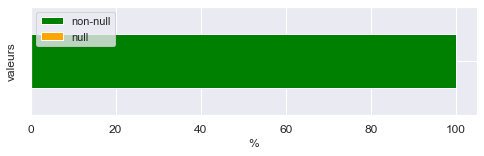

In [238]:
# Agréger les séries temporelles des agrégats de pays
agreger_temps_agreg_countries = agreger_temps(agreg_countries_df, annees, '2020')

# Imputation des valeurs manquantes depuis les agrégats par région
for indicator in indicators:
    rows = df[df[indicator].isnull()].index
    for row in rows:
        region=df.loc[row,'Region']
        region_code = agreg_md[agreg_md['Short Name'].str.startswith(region)]['Country Code'].values[0]
        val = agreger_temps_agreg_countries[(agreger_temps_agreg_countries['Country Code']==region_code) & (agreger_temps_agreg_countries['Indicator Name']==indicator)]['Val']        
        df.loc[row, indicator] = val.values[0] if len(val)>0 else np.nan

verifier_taille(df)

valeurs_manquantes(df)

<em># Avec cette deuxième imputation, il n'y a quasiment aucune valeur manquante</em>

#### 2.4.3.3 Avec les agrégats de pays par groupe économique

Le data set contient :
	- 200 lignes et 13 colonnes.
	- 200 pays.
	- 2 valeurs manquantes, ce qui représente 0.08 % du data set.


Country Code Short Name         Region          Income Group  \
23          BMU    Bermuda  North America  High income: nonOECD   

    Enrolment in upper secondary education, both sexes (number)  \
23                                             2188.0             

    Enrolment in post-secondary non-tertiary education, both sexes (number)  \
23                                          1499981.5                         

    Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total  \
23                                                NaN                                                                                

    Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total  \
23                                                NaN                                                                               

    Population, total  Population growth (annual %)  \
23            65331.0                       0.14716   

    Internet users (per 100 people)  Personal computers (per 100 people)  \
23                             98.0                            22.296631   

      Year  
23  2013.0

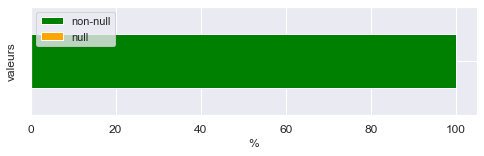

In [239]:
# Imputation des valeurs manquantes depuis les agrégats par groupe économique
for indicator in indicators:
    rows = df[df[indicator].isnull()].index
    for row in rows:
        inc_grp=str(df.loc[row,'Income Group']).split('income')[0]+'income'
        inc_grp_code = agreg_md[agreg_md['Short Name'].str.startswith(inc_grp)]['Country Code'].values[0]
        val = agreger_temps_agreg_countries[(agreger_temps_agreg_countries['Country Code']==inc_grp_code) & (agreger_temps_agreg_countries['Indicator Name']==indicator)]['Val']        
        df.loc[row, indicator] = val.values[0] if len(val)>0 else np.nan

verifier_taille(df)

valeurs_manquantes(df)

<em># Cette troisième imputation est la dernière. Elle a échoué, on passe donc à l'élimination des individus (pays) avec les dernières valeurs manquantes non imputées</em>

### 2.4.4 Filtrer les pays avec des valeurs manquantes (valeurs non imputées précédemment)

Le data set contient :
	- 199 lignes et 13 colonnes.
	- 199 pays.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.


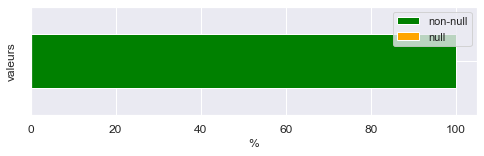

In [240]:
df.drop(valeurs_manquantes(df).index, inplace=True)
df.reset_index(drop=True, inplace=True)

verifier_taille(df)

<em># Le data set ne contient plus de données manquantes</em>

## 2.5 Transformation des variables

<em># Avant d'entamer la dernière étape du netoyage du data set, on transforme et regroupent certaines variable pour simplifier la lecture et le traitement des données</em>

In [241]:
# Ajouter un indice d'ordre dans les valeurs du groupe économique
income_order = ['Low income', 'Lower middle income', 'Upper middle income', 'High income: nonOECD', 'High income: OECD']
df['Income Group'] = df['Income Group'].map(lambda x: str(income_order.index(str(x))+1)+'.'+str(x))

# Renommer les colonnes
df.rename(columns={'Country Code': 'Code', 'Short Name': 'Name'}, inplace=True)

# Créer des nouveaux indicateurs simplifiés à partir des anciens indicateurs
# Indicateurs de population (croissance)
df['Growth (%)'] = df['Population growth (annual %)']

# Taille de la population éduquée (niveau lycée et post-lycée)
df['Education (#)'] = df['Population, total']*((df['Enrolment in upper secondary education, both sexes (number)']+df['Enrolment in post-secondary non-tertiary education, both sexes (number)'])/df['Population, total']+df['Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total']+df['Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total'])

# Pourcentage de la population avec des compétences ET (x) moyens technologiques 
df['Technology (%)']=(df['Internet users (per 100 people)']*df['Personal computers (per 100 people)'])/100

# Suppression des anciens indicateurs
df.drop(columns=indicators, inplace=True)

# Liste des variables quantitatives
quantitatives = ['Year', 'Growth (%)', 'Education (#)', 'Technology (%)']

# Liste des variables quantitatives continues (pour des graphiques adaptés)
continues = quantitatives[1:]
# Liste des variables qualitatives
qualitatives = ['Region', 'Income Group']

afficher_echantillon(df)

Voici un sous-échantillon aléatoire :


Code      Name                     Region           Income Group    Year  \
193  VUT   Vanuatu        East Asia & Pacific  2.Lower middle income  2014.0   
147  PRY  Paraguay  Latin America & Caribbean  2.Lower middle income  2013.0   

     Growth (%)  Education (#)  Technology (%)  
193    2.167915       39481.24        0.343881  
147    1.289845     1898584.92        4.000722

## 2.6 Filtrage des pays non pertinents (indicateurs à 0)

<em># Par "pays non pertinents" on entend les pays dont les valeurs d’indicateurs sont à 0. Ils seraient donc forcément à la fin du classement d’attractivité</em>

### 2.6.1 Recherche des pays non pertinents

In [242]:
pays_non_pert = df.loc[(df==0).any(axis=1)]
pays_non_pert

Code                      Name                     Region  \
145  PRK  Dem. People's Rep. Korea        East Asia & Pacific   
172  TCA  Turks and Caicos Islands  Latin America & Caribbean   

               Income Group    Year  Growth (%)  Education (#)  Technology (%)  
145            1.Low income  2012.0    0.492776      5310809.1             0.0  
172  4.High income: nonOECD  2010.0    1.620509        12265.2             0.0

### 2.6.2 Filtrage des pays non pertinents

Le data set contient :
	- 197 lignes et 8 colonnes.
	- 197 pays.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.


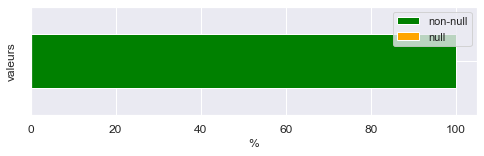

In [243]:
df.drop(pays_non_pert.index, inplace=True)
df.reset_index(drop=True, inplace=True)

verifier_taille(df)

<em># Maintenant que le data set est complétement renseigné, il est temps de passer au dernier filtrage des pays avant l’analyse exploratoire</em>

# 3 Analyse Exploratoire

## 3.1 Analyse Univariée

### 3.1.1 Mesures sur les distributions des variables quantitatives

In [244]:
def mesures_distribution(data):
    """ Calcul des mesures de distribution """
    return pd.DataFrame(data={
        'min': data.min(),
        'max':data.max(),
        'mean':data.mean(),
        'median':data.median(),       
        'var':data.var(ddof=0),
        'std':data.std(ddof=0),
        'cov':data.std(ddof=0)/data.mean()*100,
        'skew':data.skew(),
        'kurtosis':data.kurtosis()
        }).transpose()   

In [245]:
# Récupérer les colonnes quantitatives du data set
cols = df.columns[list(df.columns).index(quantitatives[0]):]

mesures_distribution(df[cols])

Year  Growth (%)  Education (#)  Technology (%)
min       2010.000000   -1.797539   1.972229e+04        0.001379
max       2017.000000    5.217721   4.132309e+08       85.981922
mean      2014.269036    1.355603   1.362262e+07       12.927015
median    2015.000000    1.264239   2.172191e+06        4.002103
var          1.242341    1.314067   2.076630e+15      382.042727
std          1.114603    1.146328   4.557005e+07       19.545913
cov          0.055335   84.562216   3.345176e+02      151.202061
skew        -1.390312    0.086000   7.040015e+00        1.977035
kurtosis     2.718604    0.046945   5.507373e+01        3.241417

### 3.1.2 Visualisaton des distributions

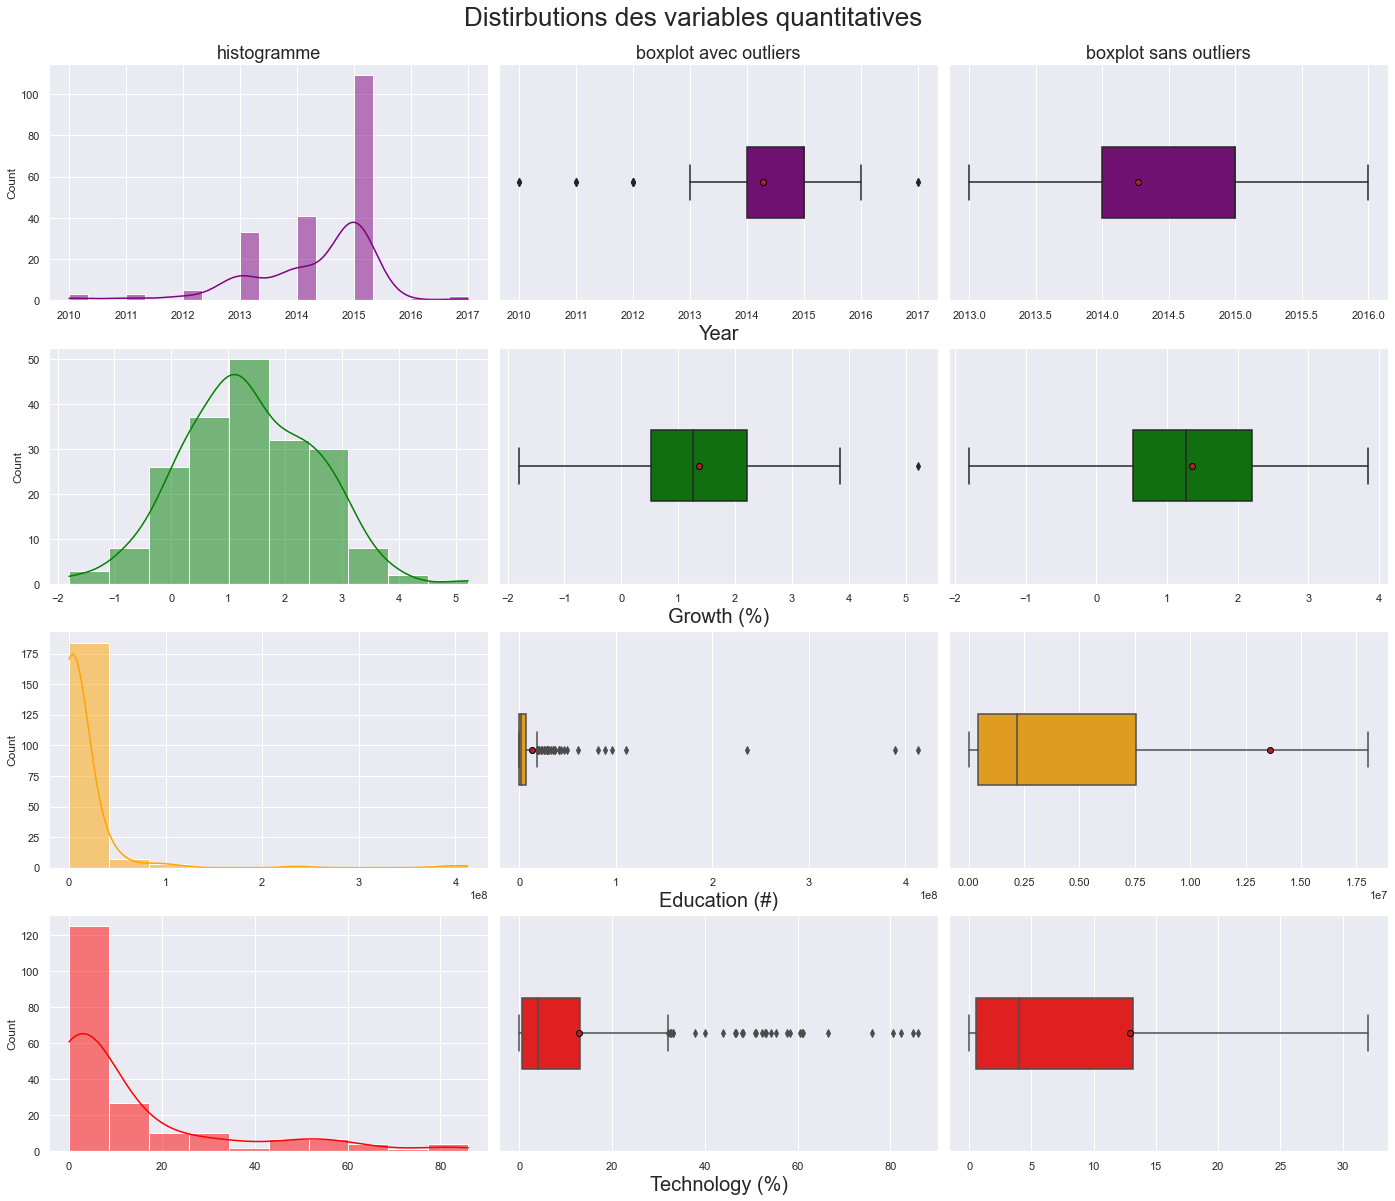

In [246]:
# Nombre de variables quantitatives
nb_quantitaves = len(quantitatives)

# Liste de couleurs
colors = ['purple', 'green', 'orange', 'red', 'yellow', 'blue', 'cyan', 'brown']

# Préparation de l'affichage des graphiques sur deux colonnes : une pour les histogrammes et une pour les boxplots
fig, axes = plt.subplots(nb_quantitaves, 3, figsize=(3*8, nb_quantitaves*5), sharex=False, sharey=False)
fig.subplots_adjust(wspace=0.025, hspace=0.2) # ajuster l'espace entre les graphiques. 
fig.suptitle('Distirbutions des variables quantitatives ', y=0.92, fontsize=26, horizontalalignment='center') # Titre globale de la figure

meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'} #Marquage des moyennes en rouge

for i in range(0, nb_quantitaves):
    data = df[quantitatives[i]]
    col = -1

    # Afficher les histogrammes sur la première colonne
    col += 1
    ax = axes[i,col]
    # Soustitre de colonne
    if i == 0:
        ax.set_title("histogramme", loc='center', y=1, fontsize=18)
    # Ajuster les classes des variables selon leurs types (continues ou discrètes) :
    bins = 'auto' if quantitatives[i] not in continues else 10
    sns.histplot(data, ax=ax, color=colors[i], kde=True, bins=bins)
    ax.set_xlabel('')

    # Afficher les boxplots sans outliers sur la deuxième colonne
    col += 1
    ax = axes[i,col]
    # Soustitre de colonne
    if i == 0:
        ax.set_title("boxplot avec outliers", loc='center', y=1, fontsize=18)
    sns.boxplot(x=data, ax=ax, color=colors[i], orient='h', width=.3, showmeans=True, meanprops=meanprops, showfliers = True) #afficher sans outliers    
    ax.set_xlabel(quantitatives[i], fontsize = 20)

    # Afficher les boxplots avec outliers sur la deuxième colonne
    col += 1
    ax = axes[i,col]
    # Soustitre de colonne
    if i == 0:
        ax.set_title("boxplot sans outliers", loc='center', y=1, fontsize=18)
    sns.boxplot(x=data, ax=ax, color=colors[i], orient='h', width=.3, showmeans=True, meanprops=meanprops, showfliers = False) #afficher sans outliers
    ax.set_xlabel('')

### 3.1.3 Conclusion sur les distributions

<em>
<ul>
<li>Les données sont relativement récentes (2015, 2014, 2013), ce qui renforce la confiance sur les données </li>
<li>La croissance démographique est quasi symétrique (autant de pays croissants que décroissant) avec une légère tendance à la décroissance</li>
<li>La proportion de la population éduquée (niveau d’étude) est extrêmement asymétrique et concentrée autour de 0.25e7 (2ème quartile ou médiane), mais quelques pays arrivent jusqu’à 40e7 (160 fois plus que le 2ème quartile) ce qui les laisse apparaître comme des outliers</li>
<li>Le niveau technologique est aussi asymétrique, dans une moindre mesure, avec beaucoup plus de pays moins développés technologiquement que de pays plus développés technologiquement (c’est pays sont vus comme des outliers)  </li>
</ul>
</em>

## 3.2 Analyse Bivariée

<p><em># On s'intéresse dans la suite aux dépendances qui peuvent exister entre les variables</em></p>

In [247]:
# On supprime l'anée de la liste des indicateurs
quantitatives.remove('Year')

<em>
    <p># On supprime l'année de la liste des indicateurs (quantitatives), utilisés pour la construction du score d'attractivité des pays, car elle est un indicateur de la confiance sur les données et ne pas un indicateur sur l’attractivité d’un pays.  
        </p>
</em>

### 3.2.0 Fonction Utilitaire

In [248]:
def force_mesure(mesure, type):
    """ Renvoie un texte avec la force de la mesure selon les seuils """
    force_text = ''

    #Définition des seuils/intervalles de mesure
    seuils = {0: 'aucune', .2: 'faible', .4: 'moyenne', .6: 'forte', .8: 'très forte'}

    for seuil, force in seuils.items():
        if np.abs(mesure) >= seuil :
            force_text = force

    return force_text + ' ' + type

### 3.2.1 Corrélations Linéaires

#### 3.2.1.0 Fonction Utilitaire

In [249]:
def afficher_correlations(data, variables, categorie=None):
    """ Calcul et affichage des corrélations linéaires entre les 'variables' """
    # Calcul des corrélations
    data = data[(variables+[categorie] if categorie != None else variables)].copy()
    correlations = data.corr()
            
    # Afficher les paires de dispersion
    hue_order = data[categorie].sort_values().unique() if categorie != None else None
    g = sns.PairGrid(data, hue=categorie, hue_order=hue_order)
    g.fig.suptitle('Corrélations linéaires des variables quantitatives ', y=1.05, fontsize=24, horizontalalignment='center') # Titre globale de la figure
    
    # Afficher sur la diagonale les dispersions, par rapport à la catégorie si donnée
    g.map_diag(sns.kdeplot, fill=True)
    
    # Afficher ailleurs les scatter plots avec les régressions linéaires, par rapport à la catégorie si donnée
    g.map_offdiag(sns.regplot, scatter=False, ci=None)
    g.map_offdiag(sns.scatterplot)
    
    # Afficher la légende (catégorie si donnée)
    g.add_legend()

    # Afficher le résultat des corrélations sur les scatter plots
    for i in range(len(variables)):
        for j in range(len(variables)):
            ax = g.axes[i,j]  
            corr = round(correlations.loc[variables[i], variables[j]],2)
            ax.set_title('r²=' + str(corr) + ' (' + force_mesure(corr, 'corrélation') + ')', y=0.99, loc='left')

#### 3.2.1.1 Corrélations selon la région

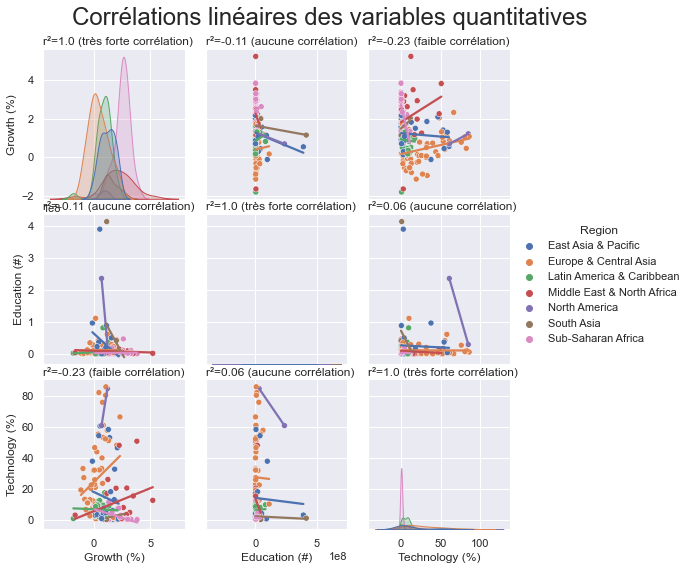

In [272]:
afficher_correlations(df, quantitatives, 'Region')

<em># Il n'y a pas de fortes corrélations qui se dégagent. Par contre, on peut constater visuellement (grâce aux régressions linéaires colorées) certaines fortes ou moyennes corrélations au sein d'une même région. On s'intéressera à l'impact des variables qualitatives plus tard</em>

#### 3.2.1.2 Corrélations selon la catégorie économique

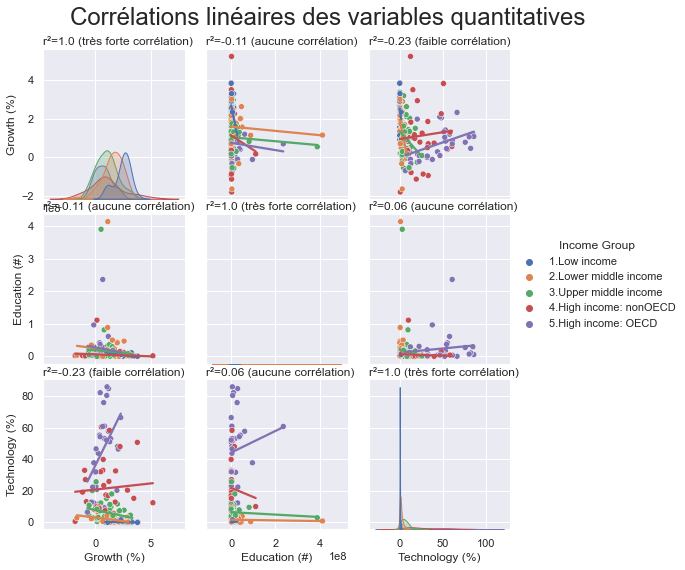

In [251]:
afficher_correlations(df, quantitatives, 'Income Group')

<em># Comme précédemment, on observe certaines corrélations par catégorie économique</em>

#### 3.2.1.3 Conclusion sur la corrélation linéaire

<em>Les variables quantitatives sont toutes globalement indépendantes les unes des autres, ce qui nous évitera d’éliminer des variables lors de la création du score d’attractivité plus tard.</em>

### 3.2.2 ANOVA : Analyse des variances

#### 3.2.2.0 Fonctions utilitaires

In [252]:
def eta_squared(x,y):
    """ Calcul état carré entre X et Y """
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [253]:
def ANOVA(data, X, Ys):    
    """ Analyse de la variance des variables en paramètres """
    data = data.sort_values(X, ascending=False) #Ordonner le data set sur la catégorie permettra éventuellement de voir les possibles corrélations sur les graphiques

    #Préparation de l'affichage des graphiques (boxplots, dispersions) des variables quantitatives Ys par rapport à la variable qualitative X
    lines = len(Ys)
    cols = 2
    index = 0
    fig, axes = plt.subplots(lines, cols, figsize=(cols*12, lines*5), sharex=False, sharey=False)
    fig.subplots_adjust(wspace=0.025, hspace=0.2) # ajuster l'espace entre les graphiques.     
    meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'} #Marquage des moyennes en rouge

    n2s = 0 #Somme des variances (état carré)

    # Affichages des graphiques pour chaque Y
    for Y in Ys:        
        #Calcul de la corrélation entre la variable qualitative X et la variable quantitaive Y
        n2 = round(eta_squared(data[X],data[Y]),2)
        n2s += n2

        index = Ys.index(Y)*cols+1 #Index des sous figures

        # Afficher les dispersions        
        ax = plt.subplot(lines,cols,index)
        ax = sns.kdeplot(data=data, x=Y, hue=X)        
        ax.set_title('n²=' + str(n2) + ' (' + force_mesure(n2, 'variance') + ')', x=1.1, loc='right') #Afficher et ajuster la position du titre des graphiques (valeur et type de la corrélation)
        ax.set_xlabel(Y, fontsize = 16)

        index += 1
        # Afficher les boxplots        
        ax = plt.subplot(lines,cols,index)
        ax = sns.boxplot(data=data, y=X, x=Y, showmeans=True, meanprops=meanprops, showfliers = False) #Afficher les moyennes et Cacher les outliers        
        ax.set_xlabel(Y, fontsize = 16)
        ax.get_yaxis().set_label_position('right')
        ax.get_yaxis().tick_right()

    
    mu_n2s = round(n2s/lines,2) #moyenne des variances (variance moyenne)
    fig.suptitle('Variance par ' + X + ' (n²=' + str(mu_n2s) +' ' + force_mesure(mu_n2s, 'variance moyenne') + ')', y=0.92, fontsize=24, horizontalalignment='center') # Titre globale de la figure

#### 3.2.2.1 Variance par rapport à la région

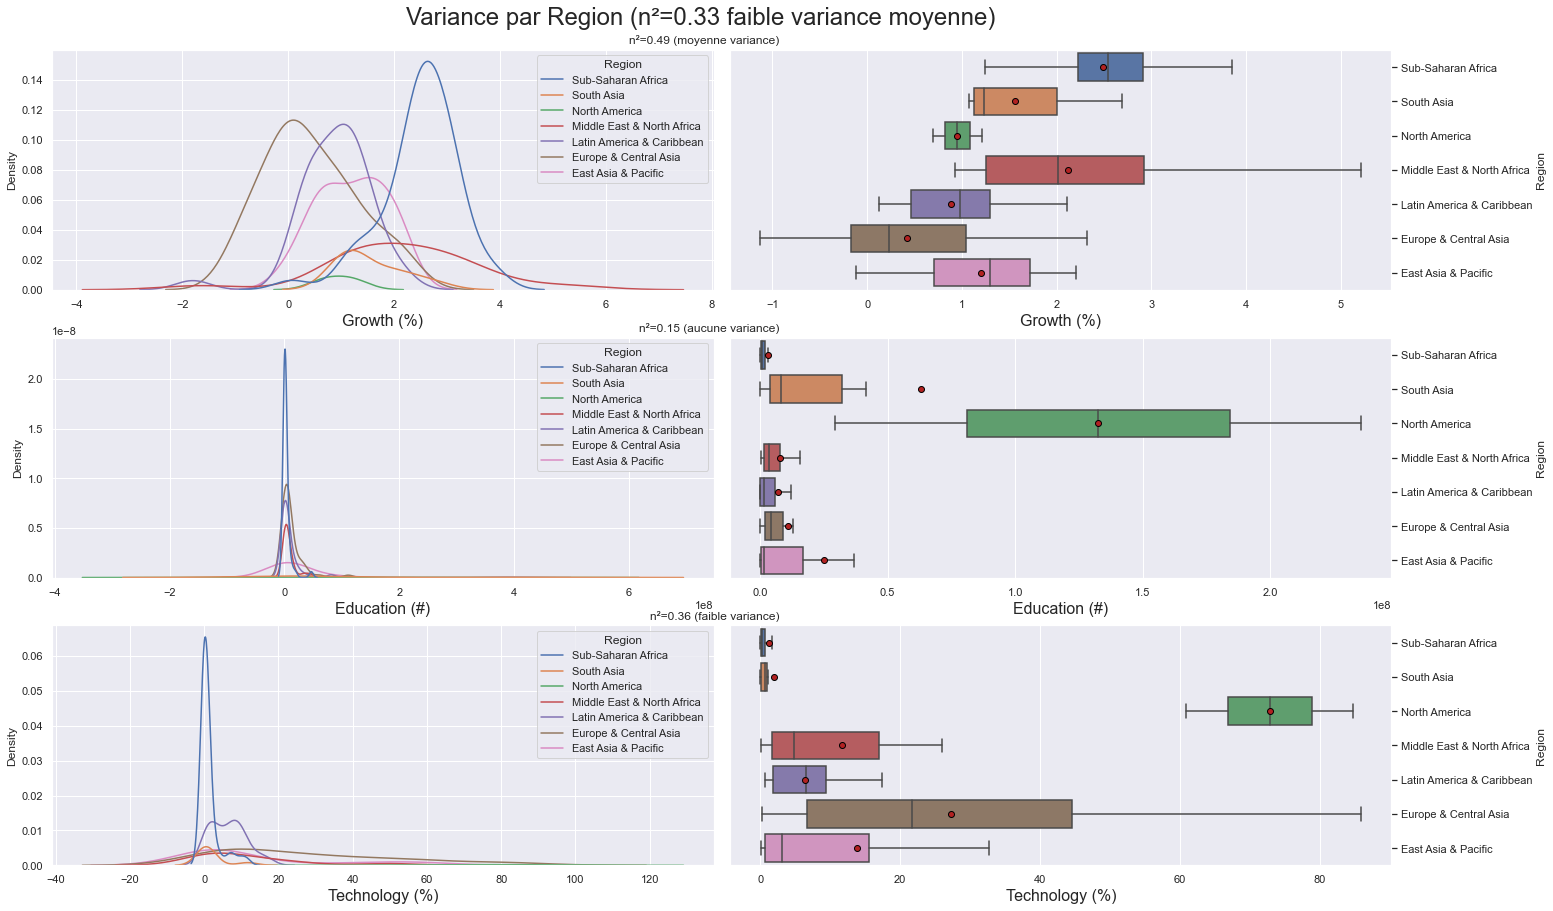

In [254]:
X = 'Region' #qualitative
ANOVA(df, X, quantitatives)

<p><em># La région géographique d'un pays a un impact, faible à moyen, sur la croissance et le niveau technologique de la population (régions pauvres, régions en développement et régions développées)</em> </p>
<p><em># On note aussi de manière évidente que la région d’Amérique du Nord se dégage des autres région avec une forte éducation et niveau technologique, ce qui est un premier indice sur le haut du futur classement de l’attractivité des pays. On attendra la suite de cette étude nous en dira plus</p>

#### 3.2.2.2 Variance par rapport à la catégorie économique

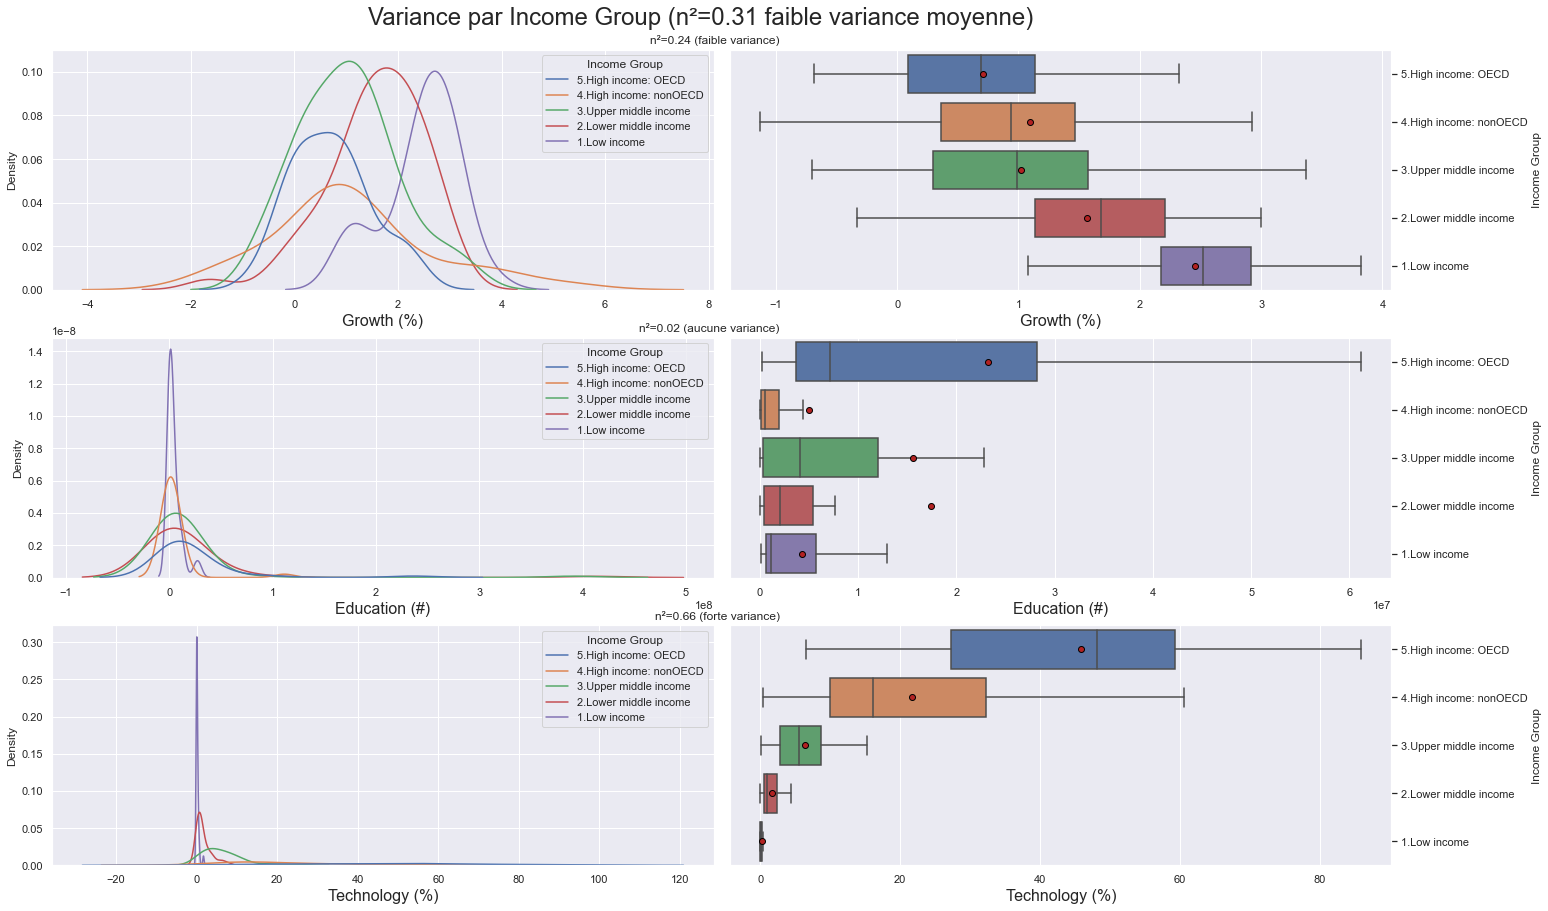

In [255]:
X = qualitatives[1] # 'Income Group' qualitative
ANOVA(df, X, quantitatives)

<p><em># La catégorie économique a un faible impact sur la croissance démographique, mais un très fort impact sur le niveau technologique. Cela est intuitif car plus un pays est riche plus sa population a les moyens de s'équiper. Attention cela peut être un biais de confirmation ! (on voit ce qu'on veut voir) </em></p>
<p><em># On constate cette fois que les pays de l’OCDE sont les plus avantagés</p>

# 4 Analyse Métier : Rechercher les pays les plus attractifs

<em># L'étape finale de ce projet est le classement des pays par leur attractivité selon un score défini depuis les variables du data set</em>

## 4.1 Transformer les indicateurs en indices (entre 0 et 1)

In [256]:
# Liste des indices à exploiter
indices = []

### 4.1.1 Réduction d'échelle des variables pourcentage (%)

In [257]:
for indicator in quantitatives:
    if indicator.endswith('(%)'):
        # Nommer l'indice et l'ajouter à la liste des indices
        indice = indicator.split('(%)')[0].strip() + '_INDC'
        indices.append(indice)

        # Transformation (division par 100)
        df[indice] = df[indicator] / 100

afficher_echantillon(df)

Voici un sous-échantillon aléatoire :


Code                      Name                 Region  \
166  SVN                  Slovenia  Europe & Central Asia   
29   CAF  Central African Republic     Sub-Saharan Africa   

            Income Group    Year  Growth (%)  Education (#)  Technology (%)  \
166  5.High income: OECD  2015.0    0.063657   1.495884e+06       32.065700   
29          1.Low income  2015.0    1.061655   2.358832e+05        0.012118   

     Growth_INDC  Technology_INDC  
166     0.000637         0.320657  
29      0.010617         0.000121

### 4.1.2 Normalisation min-max des variables de comptage (#)

<em># La normalisation min-max permet de ramener toutes les variables quantitatives à la même échelle entre 0 et 1, pour homogénéiser les calculs</em>

In [258]:
for indicator in quantitatives:
    if indicator.endswith('(#)'):
        # Nommer l'indice et l'ajouter à la liste des indices
        indice = indicator.split('(#)')[0].strip() + '_INDC'
        indices.append(indice)

        # Normalisation
        max_value = df[indicator].max()
        min_value = df[indicator].min()
        df[indice] = (df[indicator] - min_value) / (max_value - min_value)        

afficher_echantillon(df)

Voici un sous-échantillon aléatoire :


Code    Name               Region            Income Group    Year  \
26   BRN  Brunei  East Asia & Pacific  4.High income: nonOECD  2013.0   
130  NER   Niger   Sub-Saharan Africa            1.Low income  2015.0   

     Growth (%)  Education (#)  Technology (%)  Growth_INDC  Technology_INDC  \
26     1.345029     266082.408        6.728926     0.013450         0.067289   
130    3.826066     313628.870        0.003279     0.038261         0.000033   

     Education_INDC  
26         0.000596  
130        0.000711

## 4.2 Création score d'attractivité par combinaison des indices de base

<em># On construit le score selon deux méthodes/mesures : la moyenne pondérée et la f-mesure pondérée. Examine les résultats et la différence entre les deux dans ce qui suit </em>

In [259]:
# Poids des indices de bas pour le calcul du score d'attractivité
poids = {'Education_INDC': 1,  'Technology_INDC':2} # Quand tous les poids valent 1 c'est la moyenne arithmétique basique
somme_poids = np.sum(list(poids.values()))

<em><p># les poids permettent d'exprimer la force (l'ordre d'importance) des indices dans le calcul du score final. Dans notre on donne plus d'importance à la croissance des pays et de la "primeur" des donnés (données plus récentes)</p></em>
<em><p># On exclut la croissance d’un pays des indices de bases, mais il sera utilisé facteur de croissance pour le score d’attractivité</p></em>

In [260]:
# Calcul du score d'attractivité avec moyenne géométrique pondérée sur les indices de bases
df['Score_WGM'] = np.power(np.prod(np.power(df[poids.keys()], poids.values()), axis=1), 1/somme_poids)

# On applique le taux de croissance sur le score calculé
df['Score_WGM'] *= (1 + df['Growth_INDC'])

<em><p>#  On utilise une moyenne géométrique pondérée pour les raison suivantes :
<ul>
<li>La nature du problème nous oblige à considérer des pays avec une forte population éduquée ET -au sens mathématique/logique, ce qui ce traduit par une multiplication - un fort niveau technologique</li>
<li>La nature du data set et plus particulièrement les variables "Education" et "Technology" : </li>
<ul>
<li>suivent une progression logarithmique, "Education" en particuliers</li>
<li>contiennent des outliers qui ne perturbent pas beaucoup la moyenne géométrique, contrairement à la moyenne arithmétique qui y est très sensible</li>
</ul>
</ul>
 </p></em>

In [261]:
afficher_echantillon(df)

Voici un sous-échantillon aléatoire :


Code     Name                 Region           Income Group    Year  \
21   BLR  Belarus  Europe & Central Asia  3.Upper middle income  2015.0   
167  SWE   Sweden  Europe & Central Asia    5.High income: OECD  2015.0   

     Growth (%)  Education (#)  Technology (%)  Growth_INDC  Technology_INDC  \
21     0.184284     7348906.00        0.581397     0.001843         0.005814   
167    1.055074     7160799.74       80.536924     0.010551         0.805369   

     Education_INDC  Score_WGM  
21         0.017737   0.008448  
167        0.017282   0.226162

## 4.3 Afficher les pays les plus attractifs

### 4.3.0 Fonctions utilitaires

In [262]:
def score_norm(data, mesure):
    """ Normalisation min-max de la mesure de score"""
    new_df = data.copy()
    min = new_df[mesure].min()
    max = new_df[mesure].max()
    new_df[mesure+'N'] = 100* ((new_df[mesure]-min)/(max-min))
    return new_df

In [263]:
def score_group(data, mesure, categorie):
    return score_norm(data.groupby(categorie).mean(),mesure).sort_values(mesure+'N', ascending=False)

In [264]:
def afficher_carte(data_frame, mesure, categorie=None):
    """ Renvoie la carte de chaleur des pays selon leur mesure """
    # Création de la carte vierge    
    m = folium.Map( tiles='cartodbpositron', location=[28, 0], zoom_start=3)

    folium.TileLayer('openstreetmap').add_to(m)
    folium.TileLayer('Stamen Terrain').add_to(m)
    folium.TileLayer('Stamen Toner').add_to(m)
    folium.TileLayer('Stamen Water Color').add_to(m)
    folium.TileLayer('cartodbdark_matter').add_to(m)
    
    # Etablir la palette des couleurs (dégradé)
    linear = None
    
    if not categorie:
        data = score_norm(data_frame, mesure) # Normaliser la mesure (socre)

        # Préparer la palette
        mesure = mesure + 'N'        
    
    else : # Si catégorie renseignée
        # Grouper sur la catégorie
        data = data_frame
        categorie_data = data.groupby(categorie).mean()
        categorie_data = categorie_data.reset_index(level=categorie)[[categorie,mesure]]
        
        categorie_data = score_norm(categorie_data, mesure) # Normaliser la mesure (socre)        
        mesure = mesure + 'N'
        data = categorie_data.merge(data[['Code',categorie]])
        categories = data.sort_values(mesure)[categorie].unique()

    linear = cm.LinearColormap(["white", "red","yellow", "green"], vmin=data[mesure].min(), vmax=data[mesure].max(), caption = 'Attractivité pour des formations en ligne (' + mesure + ')')     
    linear.add_to(m) # Afficher la palette   
    
    # Fonction de colorisation des données (pays)    
    map_colors = lambda x: {
        'fillColor': (linear(data[data["Code"]==x['properties']['adm0_a3_us']][mesure].min()) if data[data["Code"]==x['properties']['adm0_a3_us']][mesure].min()>=0 else 'grey'),
        'color': 'black',
        'weight': 0.1,
        'fillOpacity': 0.4,
    }      

    # Récupérer les données géographiques de tous les pays et les colorer selon leur mesure
    folium.GeoJson(
        "https://data.opendatasoft.com/explore/dataset/natural-earth-countries-1_110m@public/download/?format=geojson&timezone=Europe/Berlin&lang=fr",
        style_function = map_colors,
        name = mesure,
    ).add_to(m)

    folium.LayerControl().add_to(m)
    
    return m

### 4.3.1 Au niveau mondial

<em># Classement des pays par le score d'attractivité au niveau global (sans groupement)</em>

In [265]:
# Affichage des pays les plus pertinents dans un ordre décroissant
df.sort_values('Score_WGM', ascending=False).head(5)

Code            Name                 Region         Income Group    Year  \
186  USA   United States          North America  5.High income: OECD  2015.0   
30   CAN          Canada          North America  5.High income: OECD  2013.0   
46   DEU         Germany  Europe & Central Asia  5.High income: OECD  2015.0   
63   GBR  United Kingdom  Europe & Central Asia  5.High income: OECD  2014.0   
89   JPN           Japan    East Asia & Pacific  5.High income: OECD  2014.0   

     Growth (%)  Education (#)  Technology (%)  Growth_INDC  Technology_INDC  \
186    0.692801   2.358419e+08       60.877011     0.006928         0.608770   
30     1.213891   2.942288e+07       84.850920     0.012139         0.848509   
46     1.193867   6.121650e+07       57.809004     0.011939         0.578090   
63     0.777542   2.717272e+07       75.982102     0.007775         0.759821   
89    -0.115284   9.640221e+07       37.819127    -0.001153         0.378191   

     Education_INDC  Score_WGM  
186        0.570706   0.599936  
30         0.071158   0.375911  
46         0.148100   0.371538  
63         0.065712   0.338626  
89         0.233252   0.321550

<p><em># On constate que les "États-Unis" se dégagent très clairement comme pays le plus attractif </em><p>
<p><em># On affiche ci-après une carte représentant ce classement de manière visuelle</em><p>

In [271]:
afficher_carte(df, 'Score_WGM')

<p><em># Les pays en gris sont ceux qui ont été filtrés précédemment du data set</em></p>
<p><em># On va maintenant s’intéresse au classement selon les catégories (région et économie)</em><p>

### 4.3.2 Par région

In [267]:
score_group(df, 'Score_WGM', 'Region')

Year  Growth (%)  Education (#)  \
Region                                                               
North America               2014.000000    0.953346   1.326324e+08   
Europe & Central Asia       2014.769231    0.422211   1.103693e+07   
East Asia & Pacific         2014.032258    1.197687   2.492491e+07   
Middle East & North Africa  2014.047619    2.122460   7.693749e+06   
Latin America & Caribbean   2014.138889    0.885197   7.134352e+06   
South Asia                  2014.000000    1.562222   6.320568e+07   
Sub-Saharan Africa          2014.127660    2.492068   3.143562e+06   

                            Technology (%)  Growth_INDC  Technology_INDC  \
Region                                                                     
North America                    72.863966     0.009533         0.728640   
Europe & Central Asia            27.331695     0.004222         0.273317   
East Asia & Pacific              13.807884     0.011977         0.138079   
Middle East & North Africa       11.772023     0.021225         0.117720   
Latin America & Caribbean         6.441057     0.008852         0.064411   
South Asia                        1.912594     0.015622         0.019126   
Sub-Saharan Africa                1.217238     0.024921         0.012172   

                            Education_INDC  Score_WGM  Score_WGMN  
Region                                                             
North America                     0.320932   0.487923  100.000000  
Europe & Central Asia             0.026662   0.089117   17.417277  
East Asia & Pacific               0.060272   0.058873   11.154501  
Middle East & North Africa        0.018572   0.042273    7.717225  
Latin America & Caribbean         0.017218   0.023236    3.775018  
South Asia                        0.152914   0.010938    1.228404  
Sub-Saharan Africa                0.007560   0.005005    0.000000

In [268]:
afficher_carte(df, 'Score_WGM', 'Region') # Les pays d'une même région une bordure de même couleur

<em># Les pays occidentaux sont les pays les plus attractifs</em>

### 4.3.3 Par catégorie économique

In [269]:
score_group(df, 'Score_WGM', 'Income Group')

Year  Growth (%)  Education (#)  \
Income Group                                                     
5.High income: OECD     2014.612903    0.706091   2.322355e+07   
4.High income: nonOECD  2014.062500    1.094515   4.947494e+06   
3.Upper middle income   2014.150943    1.019705   1.555898e+07   
2.Lower middle income   2014.354167    1.566090   1.745748e+07   
1.Low income            2014.212121    2.452233   4.327906e+06   

                        Technology (%)  Growth_INDC  Technology_INDC  \
Income Group                                                           
5.High income: OECD          45.887348     0.007061         0.458873   
4.High income: nonOECD       21.701649     0.010945         0.217016   
3.Upper middle income         6.410985     0.010197         0.064110   
2.Lower middle income         1.735420     0.015661         0.017354   
1.Low income                  0.199365     0.024522         0.001994   

                        Education_INDC  Score_WGM  Score_WGMN  
Income Group                                                   
5.High income: OECD           0.056155   0.181183  100.000000  
4.High income: nonOECD        0.011926   0.045685   24.033362  
3.Upper middle income         0.037606   0.031773   16.233735  
2.Lower middle income         0.042201   0.013049    5.735935  
1.Low income                  0.010426   0.002818    0.000000

In [270]:
afficher_carte(df, 'Score_WGM', 'Income Group') # Les pays d'une même catégorie économique une bordure de même couleur

<em># Les pays les plus riches sont les pays les plus attractifs</em>

## 4.4 Conclusion

<p><em>Après observation des différents résultats, on peut conclure que si on devait choisir un seul pays pour l'expansion de l'entreprise, les Etats-Unis et l'Amérique du Nord sur une plus grande échelle serait le choix le plus évident car se trouvant toujours en top position, et ce quel que soit le critère de groupement (global, régional, économique), au vu de sa forte population éduqué , leurs équipement technologique et la tendance à la croissance.</em><p>
<p><em>De manière générale les pays les plus riches, développés et avec une forte population étudiantes et diplômés, aussi avec un légers avantage ou désavantage selon le taux de croissance du pays</em><p>
<p><em>Pour la suite du classement, je recommande : 
<ol>
<li>L’Allemagne et la Grande Bretagne en Europe, pour leurs croissance positive et proximité géographique</li>
<li>Le  Japon et la Corée du Sud pour l’Asie. Ces pays permettraient de tester la qualité/robustesse des formations proposées par un publique différent en termes de système éducatif et de langue primaire</li>
</ol> </em><p>